<a href="https://colab.research.google.com/github/baikAnalyst/Seoul_Software_Academy/blob/main/05.NLP/DA_reviewData_NLP_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings # to ignore warning messages

warnings.filterwarnings(action='ignore')

# warnings.filterwarnings(action='default') # to see the warning messages again

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/sesac_jongro/NLP/data/review.csv', sep='\t')     #it is better to separate by tab insead of comma in case of korean
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# Preprocessing -  morpheme analysis -  tokenize - LDA Modeling -pyLDAvis(visualization)

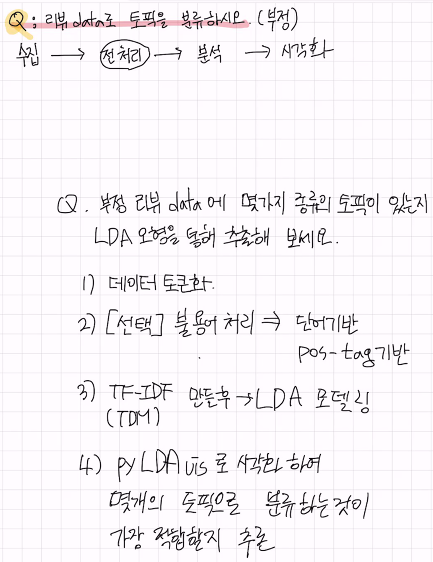

In [ ]:
# postive label ==1, negative label == 0
# to analyze negative responses only


label_0 = (df.label == 0)
label_0

0        True
1       False
2        True
3        True
4       False
        ...  
9995     True
9996     True
9997    False
9998    False
9999     True
Name: label, Length: 10000, dtype: bool

In [ ]:
df_0 = df[label_0]
df_0

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
...,...,...,...
9992,1784769,5분은 재밌었으니 별2개,0
9993,10007001,1점은 아니고 한 6점 정도 주고 싶은데 평점이 너무 높아서 1점 줌. 영화가 의외...,0
9995,8665166,곰티비로 무료로 봤기때문에 5점주려고했는데 1 한국 공포영화의 특징인 깜놀시키려 하...,0
9996,8312675,이딴걸드라마라고썼냐 수습할수없으면걍친자녀아니면되고 간단하네 얼굴을바꿨으면 결말이라도...,0


In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.8 MB/s eta 0:00:00


In [ ]:
# tokenize into the morphemes by okt(open korean text)

from konlpy.tag import Okt
okt = Okt()
okt_tokens = okt.morphs(df_0.to_string())
okt_tokens

['id',
 'document',
 'label',
 '\n',
 '0',
 '9976970',
 '아',
 '더빙',
 '..',
 '진짜',
 '짜증나네요',
 '목소리',
 '0',
 '\n',
 '2',
 '10265843',
 '너',
 '무재',
 '밓었',
 '다그',
 '래서',
 '보는것을',
 '추천',
 '한',
 '다',
 '0',
 '\n',
 '3',
 '9045019',
 '교도소',
 '이야기',
 '구먼',
 '..',
 '솔직히',
 '재미',
 '는',
 '없다',
 '..',
 '평점',
 '조정',
 '0',
 '\n',
 '5',
 '5403919',
 '막',
 '걸음',
 '마',
 '뗀',
 '3',
 '세',
 '부터',
 '초등학교',
 '1',
 '학년',
 '생인',
 '8',
 '살용',
 '영화',
 '.',
 'ㅋㅋㅋ',
 '...',
 '별',
 '반개',
 '도',
 '아까',
 '움',
 '.',
 '0',
 '\n',
 '6',
 '7797314',
 '원작',
 '의',
 '긴장감',
 '을',
 '제대로',
 '살려내지못',
 '했다',
 '.',
 '0',
 '\n',
 '7',
 '9443947',
 '별',
 '반개',
 '도',
 '아깝다',
 '욕',
 '나온다',
 '이응경',
 '길용우',
 '연',
 '기',
 '생활',
 '이',
 '몇',
 '년',
 '인지',
 '..',
 '정말',
 '발',
 '로',
 '해도',
 '그것',
 '보단',
 '낫겟다',
 '납치',
 '.',
 '감금',
 '만',
 '반복',
 '반복',
 '..',
 '이',
 '드라마',
 '는',
 '가족',
 '도',
 '없다',
 '연기',
 '못',
 '하는',
 '사람',
 '만',
 '모',
 '엿',
 '네',
 '0',
 '\n',
 '12',
 '5957425',
 '울면',
 '서',
 '손',
 '들',
 '고',
 '횡단보도',
 '건널',
 '때',
 '뛰',
 '쳐나',


In [ ]:
# Pos Tagging

oktTag = []
for token in okt_tokens:
    oktTag += okt.pos(token)
oktTag

# IOPub data rate exceeded error : easily can be solved by deleting print() function
# https://whoishoo.tistory.com/546

[('id', 'Alpha'),
 ('document', 'Alpha'),
 ('label', 'Alpha'),
 ('\n', 'Foreign'),
 ('0', 'Number'),
 ('9976970', 'Number'),
 ('아', 'Exclamation'),
 ('더빙', 'Noun'),
 ('..', 'Punctuation'),
 ('진짜', 'Noun'),
 ('짜증나네요', 'Adjective'),
 ('목소리', 'Noun'),
 ('0', 'Number'),
 ('\n', 'Foreign'),
 ('2', 'Number'),
 ('10265843', 'Number'),
 ('너', 'Noun'),
 ('무재', 'Noun'),
 ('밓었', 'Noun'),
 ('다그', 'Noun'),
 ('래서', 'Noun'),
 ('보는것을', 'Verb'),
 ('추천', 'Noun'),
 ('한', 'Verb'),
 ('다', 'Adverb'),
 ('0', 'Number'),
 ('\n', 'Foreign'),
 ('3', 'Number'),
 ('9045019', 'Number'),
 ('교도소', 'Noun'),
 ('이야기', 'Noun'),
 ('구먼', 'Noun'),
 ('..', 'Punctuation'),
 ('솔직히', 'Adjective'),
 ('재미', 'Noun'),
 ('는', 'Verb'),
 ('없다', 'Adjective'),
 ('..', 'Punctuation'),
 ('평점', 'Noun'),
 ('조정', 'Noun'),
 ('0', 'Number'),
 ('\n', 'Foreign'),
 ('5', 'Number'),
 ('5403919', 'Number'),
 ('막', 'Noun'),
 ('걸음', 'Noun'),
 ('마', 'Noun'),
 ('뗀', 'Verb'),
 ('3', 'Number'),
 ('세', 'Noun'),
 ('부터', 'Noun'),
 ('초등학교', 'Noun'),
 ('1', '

In [ ]:
# Stopword

from collections import Counter
Counter(oktTag).most_common()

[(('0', 'Number'), 5067),
 (('\n', 'Foreign'), 5021),
 (('.', 'Punctuation'), 2399),
 (('이', 'Noun'), 1944),
 (('영화', 'Noun'), 1633),
 (('..', 'Punctuation'), 1128),
 (('가', 'Verb'), 1023),
 (('의', 'Noun'), 958),
 (('도', 'Noun'), 937),
 (('...', 'Punctuation'), 892),
 (('에', 'Josa'), 855),
 (('들', 'Verb'), 733),
 (('을', 'Josa'), 718),
 (('는', 'Verb'), 661),
 (('은', 'Noun'), 632),
 ((',', 'Punctuation'), 584),
 (('를', 'Noun'), 546),
 (('?', 'Punctuation'), 531),
 (('한', 'Verb'), 406),
 (('다', 'Adverb'), 390),
 (('만', 'Noun'), 382),
 (('로', 'Noun'), 312),
 (('점', 'Noun'), 310),
 (('너무', 'Adverb'), 293),
 (('으로', 'Josa'), 289),
 (('진짜', 'Noun'), 284),
 (('안', 'Noun'), 277),
 (('1', 'Number'), 265),
 (('못', 'Noun'), 247),
 (('평점', 'Noun'), 244),
 (('적', 'Noun'), 241),
 (('스토리', 'Noun'), 238),
 (('나', 'Noun'), 236),
 (('정말', 'Noun'), 232),
 (('....', 'Punctuation'), 230),
 (('에서', 'Josa'), 222),
 (('것', 'Noun'), 219),
 (('쓰레기', 'Noun'), 218),
 (('그냥', 'Noun'), 215),
 (('감독', 'Noun'), 214),


In [ ]:
# Stopword processing
stopPos = ['Punctuation', 'Exclamation', 'Foreign', 'Alpha', 'Josa', 'KoreanParticle', 'Suffix', 'Number']
stopWord = ['속', '고', '가', '엔', '은', '는', '이', '도', '듯' '아햏햏', '를', '임', '뭐', '허허', '흠', '짝짝', '만', '들', '의', '로',
                  '안', '점', '이나', '걍', '지', '거', '과', '면', '또', '네', '입니다', '요', '적', '못', '게', '그', '내', '인', '더', '한',
                  '다', '것', '잘', '막', '딱', '언']

word = []
for tag in oktTag:
    if tag[1] not in stopPos:
        if tag[0] not in stopWord:
            word.append(tag[0])
word

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['더빙',
 '진짜',
 '짜증나네요',
 '목소리',
 '너',
 '무재',
 '밓었',
 '다그',
 '래서',
 '보는것을',
 '추천',
 '교도소',
 '이야기',
 '구먼',
 '솔직히',
 '재미',
 '없다',
 '평점',
 '조정',
 '걸음',
 '마',
 '뗀',
 '세',
 '부터',
 '초등학교',
 '학년',
 '생인',
 '살용',
 '영화',
 '별',
 '반개',
 '아까',
 '움',
 '원작',
 '긴장감',
 '제대로',
 '살려내지못',
 '했다',
 '별',
 '반개',
 '아깝다',
 '욕',
 '나온다',
 '이응경',
 '길용우',
 '연',
 '기',
 '생활',
 '몇',
 '년',
 '인지',
 '정말',
 '발',
 '해도',
 '그것',
 '낫겟다',
 '납치',
 '감금',
 '반복',
 '반복',
 '드라마',
 '가족',
 '없다',
 '연기',
 '하는',
 '사람',
 '모',
 '엿',
 '울면',
 '서',
 '손',
 '횡단보도',
 '건널',
 '때',
 '뛰',
 '쳐나',
 '올',
 '뻔',
 '이범수',
 '연기',
 '드럽게',
 '해',
 '취향',
 '존중',
 '다지',
 '진짜',
 '내생',
 '극장',
 '본',
 '영화',
 '중',
 '가장',
 '노잼',
 '노',
 '감동',
 '스토리',
 '어거지',
 '감동',
 '어거지',
 '굿바이',
 '레닌',
 '표절',
 '이해',
 '하는데',
 '왜',
 '뒤',
 '갈수록',
 '재미',
 '없어지냐',
 '재미없다',
 '지루하고',
 '같은',
 '음식',
 '영화',
 '바베트',
 '만찬',
 '하고',
 '넘',
 '차이남',
 '바베트',
 '만찬',
 '이야기',
 '있고',
 '음식',
 '보는',
 '재미',
 '있는데',
 '이건',
 '볼',
 '없다',
 '음식',
 '별로',
 '나오고',
 '핀란드',
 '풍경',
 '구',
 '경',
 '할랫',
 '는데',
 '그것',
 '별로',

In [ ]:
docs = word

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# tokenizing

from gensim import corpora
from gensim.models import LdaModel, TfidfModel

tokenized_docs = [doc.split(' ') for doc in docs]
tokenized_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['더빙'],
 ['진짜'],
 ['짜증나네요'],
 ['목소리'],
 ['너'],
 ['무재'],
 ['밓었'],
 ['다그'],
 ['래서'],
 ['보는것을'],
 ['추천'],
 ['교도소'],
 ['이야기'],
 ['구먼'],
 ['솔직히'],
 ['재미'],
 ['없다'],
 ['평점'],
 ['조정'],
 ['걸음'],
 ['마'],
 ['뗀'],
 ['세'],
 ['부터'],
 ['초등학교'],
 ['학년'],
 ['생인'],
 ['살용'],
 ['영화'],
 ['별'],
 ['반개'],
 ['아까'],
 ['움'],
 ['원작'],
 ['긴장감'],
 ['제대로'],
 ['살려내지못'],
 ['했다'],
 ['별'],
 ['반개'],
 ['아깝다'],
 ['욕'],
 ['나온다'],
 ['이응경'],
 ['길용우'],
 ['연'],
 ['기'],
 ['생활'],
 ['몇'],
 ['년'],
 ['인지'],
 ['정말'],
 ['발'],
 ['해도'],
 ['그것'],
 ['낫겟다'],
 ['납치'],
 ['감금'],
 ['반복'],
 ['반복'],
 ['드라마'],
 ['가족'],
 ['없다'],
 ['연기'],
 ['하는'],
 ['사람'],
 ['모'],
 ['엿'],
 ['울면'],
 ['서'],
 ['손'],
 ['횡단보도'],
 ['건널'],
 ['때'],
 ['뛰'],
 ['쳐나'],
 ['올'],
 ['뻔'],
 ['이범수'],
 ['연기'],
 ['드럽게'],
 ['해'],
 ['취향'],
 ['존중'],
 ['다지'],
 ['진짜'],
 ['내생'],
 ['극장'],
 ['본'],
 ['영화'],
 ['중'],
 ['가장'],
 ['노잼'],
 ['노'],
 ['감동'],
 ['스토리'],
 ['어거지'],
 ['감동'],
 ['어거지'],
 ['굿바이'],
 ['레닌'],
 ['표절'],
 ['이해'],
 ['하는데'],
 ['왜'],
 ['뒤'],
 ['갈수록'],
 ['재미'],
 ['없어지냐'],
 ['재미없다'],
 

In [ ]:
# unique tokens dictionary

id2word = corpora.Dictionary(tokenized_docs)
print(id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<13212 unique tokens: ['더빙', '진짜', '짜증나네요', '목소리', '너']...>


In [ ]:
# to see unique tokens

for value in id2word:
    print(value, id2word[value])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8212 느꼈다
8213 찍지
8214 미니시리즈
8215 런
8216 없는건
8217 어브
8218 코난
8219 버렸음
8220 되돌려주
8221 볼테니
8222 글구
8223 신선하게
8224 주심
8225 안되나
8226 참은
8227 석
8228 대책
8229 무능하고
8230 나쁜것
8231 분노
8232 착해서인지
8233 지식
8234 키우는
8235 은석
8236 치밀어
8237 오른다
8238 환장하겠구만
8239 시시하네
8240 시켜야
8241 의심스러울
8242 흐트러뜨리
8243 루비반지
8244 도무지
8245 진전
8246 끄는것
8247 루비
8248 답답하지만
8249 민
8250 멍청함
8251 알아차려야지
8252 경민이
8253 알아차리면
8254 줫
8255 일류
8256 자빠졌네
8257 따분하다
8258 인조
8259 죽인다
8260 쓰던
8261 똑같다
8262 스완
8263 약한듯
8264 이런저런
8265 괜찮을려나
8266 오랜만
8267 조은경
8268 주시
8269 예쁘게
8270 입맞춤
8271 소년
8272 황진
8273 미씨
8274 있네요
8275 여고괴담
8276 오션스일레븐
8277 내다
8278 셀카
8279 잼있다
8280 도랏
8281 황우슬혜
8282 이혜영
8283 강남
8284 은색
8285 재규어
8286 다니더라
8287 일만
8288 외제차
8289 뽑아
8290 사나
8291 캡슐
8292 뽑는
8293 갸차폰
8294 완구
8295 뽑으니
8296 레즈비언
8297 나왔는데
8298 배렸다
8299 어줍잖지는
8300 성지
8301 로또
8302 처녀
8303 플랜카드
8304 들고
8305 환영
8306 해줄
8307 자신있다
8308 놀라는거
8309 지저분하고
8310 솔직합니다
8311 대중
8312 시켜야지
8313 세금
8314 면세
8315 삼박자
8316 돼안
8317 높아도
8318 긴지
8319 

In [ ]:
# TDM corpus: terms' and documents' frequency

corpus_TDM = []
for doc in tokenized_docs:
    result = id2word.doc2bow(doc)
    corpus_TDM.append(result)

corpus_TDM

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1)],
 [(5, 1)],
 [(6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(9, 1)],
 [(10, 1)],
 [(11, 1)],
 [(12, 1)],
 [(13, 1)],
 [(14, 1)],
 [(15, 1)],
 [(16, 1)],
 [(17, 1)],
 [(18, 1)],
 [(19, 1)],
 [(20, 1)],
 [(21, 1)],
 [(22, 1)],
 [(23, 1)],
 [(24, 1)],
 [(25, 1)],
 [(26, 1)],
 [(27, 1)],
 [(28, 1)],
 [(29, 1)],
 [(30, 1)],
 [(31, 1)],
 [(32, 1)],
 [(33, 1)],
 [(34, 1)],
 [(35, 1)],
 [(36, 1)],
 [(37, 1)],
 [(29, 1)],
 [(30, 1)],
 [(38, 1)],
 [(39, 1)],
 [(40, 1)],
 [(41, 1)],
 [(42, 1)],
 [(43, 1)],
 [(44, 1)],
 [(45, 1)],
 [(46, 1)],
 [(47, 1)],
 [(48, 1)],
 [(49, 1)],
 [(50, 1)],
 [(51, 1)],
 [(52, 1)],
 [(53, 1)],
 [(54, 1)],
 [(55, 1)],
 [(56, 1)],
 [(56, 1)],
 [(57, 1)],
 [(58, 1)],
 [(16, 1)],
 [(59, 1)],
 [(60, 1)],
 [(61, 1)],
 [(62, 1)],
 [(63, 1)],
 [(64, 1)],
 [(65, 1)],
 [(66, 1)],
 [(67, 1)],
 [(68, 1)],
 [(69, 1)],
 [(70, 1)],
 [(71, 1)],
 [(72, 1)],
 [(73, 1)],
 [(74, 1)],
 [(59, 1)],
 [(75, 1)],
 [(76, 1)],
 [(77, 1)],
 [(78, 1)],
 [

In [ ]:
# preplexity and coherence score to find ideal number of topics


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# LDA Modeling

tfidf = TfidfModel(corpus_TDM)
corpus_TFIDF = tfidf[corpus_TDM]

n = 3            # 100 -> 50 -> 30 ->15 -> 7 -> 10 -> 5 -> 15 -> 3
lda = LdaModel(corpus = corpus_TFIDF,
                        id2word = id2word,
                        num_topics = n,
                        random_state = 100)
for t in lda.print_topics():
    print(t[0], ":", t[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0 : 0.014*"스토리" + 0.010*"내용" + 0.010*"쓰레기" + 0.009*"감독" + 0.009*"그냥" + 0.009*"시간" + 0.008*"왜" + 0.008*"사람" + 0.008*"드라마" + 0.007*"하는"
1 : 0.077*"영화" + 0.013*"정말" + 0.011*"이런" + 0.011*"나" + 0.008*"최악" + 0.008*"없는" + 0.008*"연기" + 0.007*"말" + 0.007*"보다" + 0.006*"대"
2 : 0.016*"너무" + 0.013*"진짜" + 0.011*"평점" + 0.010*"하고" + 0.007*"없다" + 0.007*"개" + 0.006*"끝" + 0.006*"때" + 0.006*"같은" + 0.006*"걸"


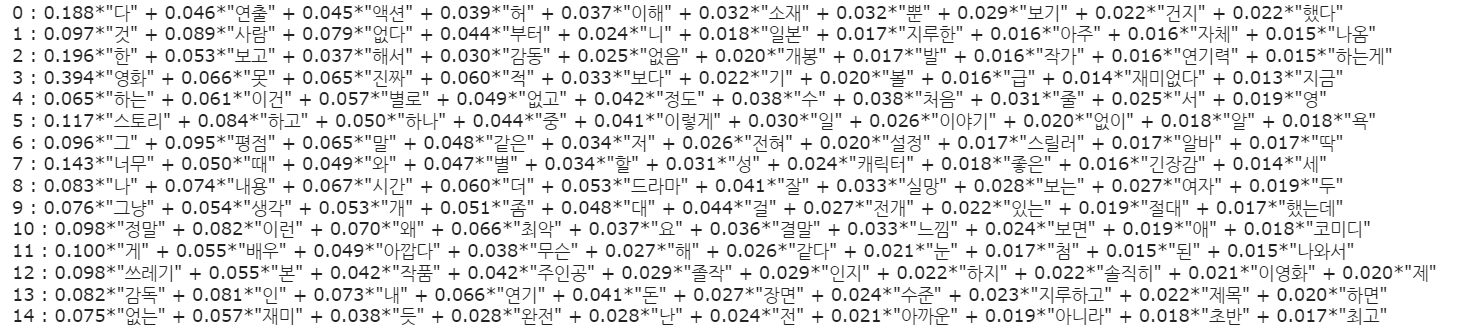

In [ ]:
# pyLDAvis

!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.1
    Uninstalling pandas-1.5.1:
      Successfully uninstalled pandas-1.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [ ]:
!pip install loky

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import sys
import time
import traceback
from loky import set_loky_pickler
from loky import get_reusable_executor
from loky import wrap_non_picklable_objects

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pandas -U

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pandas==1.5.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.1 which is incompatible.


In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus_TDM, id2word)
pyLDAvis.display(vis)               # number of clusters in visualization is the appropriate number of topics, in this case n = 3, go back to LDA Model and revise number of topics to 3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
